## Machine Learning Model
Input: Social Demographic Data
Output: Binary classifier as food desert or not

## 1. Set-up

In [105]:
# importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns 
from itertools import combinations
import numpy as np
import random

# model construction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn import metrics

# custom defined functions
from plot_functions import *

# set random seed
random.seed(10)

In [57]:
# setting the style
plt.style.use('seaborn-whitegrid')

# setting the annotation default font 
plt.rcParams["font.family"] = "roboto"
plt.rcParams["font.size"] = 10

plt.rcParams["figure.autolayout"] = False

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False


## 2. Load the Data
Load the food desert data

In [58]:
df = pd.read_csv("data.csv", index_col = 0)
df.head()


,CensusTract,State,County,LILATracts_1And10,Urban,DP03_0006PE,DP03_0088E,DP03_0119PE,DP02_0006PE,DP03_UNEMPLOY,...,state_WI,state_WV,state_WY,P001003PE/AREA,P001004PE/AREA,P001005PE/AREA,P001006PE/AREA,P001007PE/AREA,P001008PE/AREA,P001009PE/AREA
0,1001020100,AL,Autauga,0,1,1.5,1.315654,5.0,4.6,3.724928,...,0,0,0,0.000009,1.151784e-06,7.430864e-08,7.430864e-08,0.000000e+00,7.430864e-08,1.645406e-07
1,1001020200,AL,Autauga,0,1,2.6,0.680042,10.7,2.1,7.601351,...,0,0,0,0.000012,1.685954e-05,6.926678e-08,6.926678e-08,0.000000e+00,3.740406e-07,3.878940e-07
2,1001020300,AL,Autauga,0,1,1.3,0.746100,4.5,4.1,5.573248,...,0,0,0,0.000014,3.579800e-06,6.086213e-08,9.405965e-08,2.766460e-08,1.936522e-07,4.536995e-07
3,1001020400,AL,Autauga,0,1,1.4,0.931753,4.9,3.5,4.397394,...,0,0,0,0.000015,6.883440e-07,3.923204e-08,6.419788e-08,1.426620e-08,7.846408e-08,1.854606e-07
4,1001020600,AL,Autauga,0,1,1.2,0.919672,5.8,2.5,7.971014,...,0,0,0,0.000009,2.490249e-06,3.365201e-08,3.028681e-08,3.365201e-09,2.793117e-07,2.490249e-07


In [59]:
X = df.iloc[:,4:]
y = df['LILATracts_1And10']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state=42)

## 3. Logistic Regression

In [60]:
logreg = LogisticRegression()

In [61]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [62]:
# predict on the test set
y_predpro_logreg = logreg.predict_proba(X_test)[:,1]

Accuracy:0.88, Specifity:1.00 ,Sensitivity:0.00


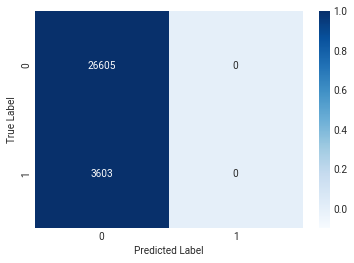

In [63]:
# evaluate the model
acc_logreg, spe_logred, sen_logreg, cm_logreg = evaluation_score(y_test,y_predpro_logreg)

From this diagram, we that the logistic regression can predict census tracts that are not food desert most the time. However, it cannot predict the food dessert very well.

## 4. Decision Tree

In [155]:
# instantiate the decision tree
dt = DecisionTreeClassifier(min_samples_leaf= 0.01)
# fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=0.01)

In [156]:
# predict the ys
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)


Accuracy:0.90, Specifity:0.98 ,Sensitivity:0.32


(0.8977754237288136,
 0.9762450667167826,
 0.31834582292533997,
 array([[25973,   632],
        [ 2456,  1147]]))

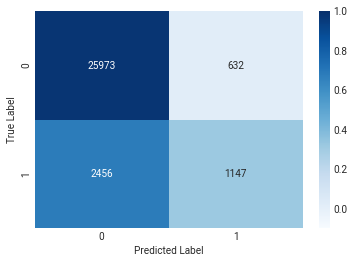

In [157]:
evaluation_score(y_test, y_pred)

From the confusion matrix, we can see there is a big improvement in terms of the sensitivity. This however, is traded-off with a loss in specificity. Now we can plot the importance of the feature to see if the result may help us identify the variables that has a higher determining power on the onset of Food Desert.

In [97]:
dt_feats = {"Variables": X_train.columns, "Importance":dt.feature_importances_}
dt_feats = pd.DataFrame(dt_feats).sort_values(by ='Importance', ascending = True).reset_index()

Text(0.5, 1.0, 'Feature Importances')

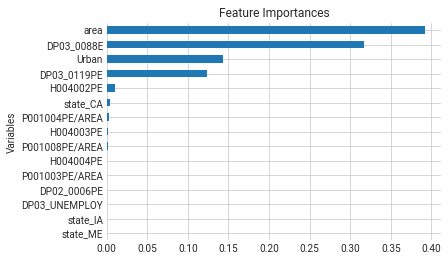

In [101]:
# instantiate the plot object
fig, ax = plt.subplots()

dt_feats.tail(15).plot.barh(y = "Importance", x = "Variables",legend = False,ax = ax)
ax.set_title("Feature Importances")

From the plot, we can see that the area of the census tract is the kost important factor, followed by median income and the binary label of "Urban". It appears that the physcial geography has a high explanatory power for the on set food desert.

For details of the purity of each leaf, we also print the tree to inspect.

[Text(0.515234375, 0.95, 'x[2] <= 0.793\ngini = 0.212\nsamples = 30208\nvalue = [26574, 3634]'),
 Text(0.2203125, 0.85, 'x[9] <= 1978107.062\ngini = 0.365\nsamples = 11851\nvalue = [9004, 2847]'),
 Text(0.1, 0.75, 'x[9] <= 795052.312\ngini = 0.176\nsamples = 4511\nvalue = [4071, 440]'),
 Text(0.05, 0.65, 'x[64] <= 0.0\ngini = 0.06\nsamples = 1790\nvalue = [1735, 55]'),
 Text(0.025, 0.55, 'x[2] <= 0.535\ngini = 0.099\nsamples = 1016\nvalue = [963, 53]'),
 Text(0.0125, 0.45, 'gini = 0.131\nsamples = 455\nvalue = [423, 32]'),
 Text(0.0375, 0.45, 'gini = 0.072\nsamples = 561\nvalue = [540, 21]'),
 Text(0.075, 0.55, 'x[64] <= 0.0\ngini = 0.005\nsamples = 774\nvalue = [772, 2]'),
 Text(0.0625, 0.45, 'gini = 0.013\nsamples = 303\nvalue = [301, 2]'),
 Text(0.0875, 0.45, 'gini = 0.0\nsamples = 471\nvalue = [471, 0]'),
 Text(0.15, 0.65, 'x[13] <= 0.5\ngini = 0.243\nsamples = 2721\nvalue = [2336, 385]'),
 Text(0.1375, 0.55, 'x[9] <= 1306689.375\ngini = 0.268\nsamples = 2193\nvalue = [1843, 350]')

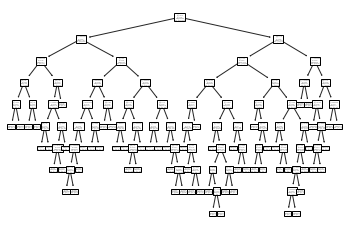

In [106]:
tree.plot_tree(dt)

#### 4.1 Random Forest
From the single decision tree, we observed significant improvement in the performance in the sensitivity metric. To add more complexity to the ML model, we will consider applying a random forest classification model.

As we observed, a lot of the variables in the dataframe are not useful and perhaps redundant. Namely, the state dummies do not seem to have any explanatory power. We will drop them because it may drag the model performance due to random forest's algorithm

In [143]:
X_train_subset = X_train[dt_feats.tail(15)['Variables']]
X_test_subset = X_test[dt_feats.tail(15)['Variables']]

In [150]:
ranf = RandomForestClassifier(max_depth=4, oob_score=True, n_estimators=5)

In [151]:
ranf.fit(X_train_subset,y_train)

/Users/Tra_FIT/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=4, n_estimators=5, oob_score=True)

In [152]:
ranf.oob_score_

0.8797007415254238

Accuracy:0.88, Specifity:1.00 ,Sensitivity:0.00


(0.8797007415254238,
 1.0,
 0.0,
 array([[26574,     0],
        [ 3634,     0]]))

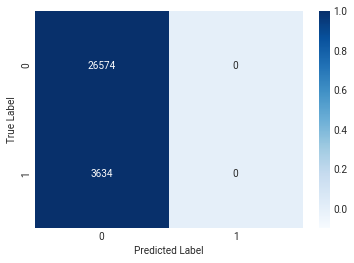

In [159]:
y_predpro_ranf = ranf.predict_proba(X_train_subset)[:,1]
evaluation_score(y_train,y_predpro_ranf)

We have only set up the random tree and evaluate its performance on the training data. Nonetheless, we observe that the model suffers again from the class imbalance. None of the food desert has been classified correctly.